In [5]:
import pandas as pd
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
network = "case24"
data_dir = os.path.join(os.getcwd(), "..", "data", network, "raw")
node_file = os.path.join(data_dir, "pf_node_OPF.csv")
edge_file = os.path.join(data_dir, "pf_edge_OPF.csv")

In [7]:
df = pd.read_csv(node_file)

C:\Users\MatteoMazzonelli\AppData\Local\Temp\ipykernel_2500\3872263316.py:27: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=node_data, x=feature, fill=True, ax=ax, alpha=0.5, color='skyblue')
C:\Users\MatteoMazzonelli\AppData\Local\Temp\ipykernel_2500\3872263316.py:27: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=node_data, x=feature, fill=True, ax=ax, alpha=0.5, color='skyblue')
C:\Users\MatteoMazzonelli\AppData\Local\Temp\ipykernel_2500\3872263316.py:27: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=node_data, x=feature, fill=True, ax=ax, alpha=0.5, color='skyblue')
C:\Users\MatteoMazzonelli\AppData\Local\Temp\ipykernel_2500\3872263316.py:27: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_sing

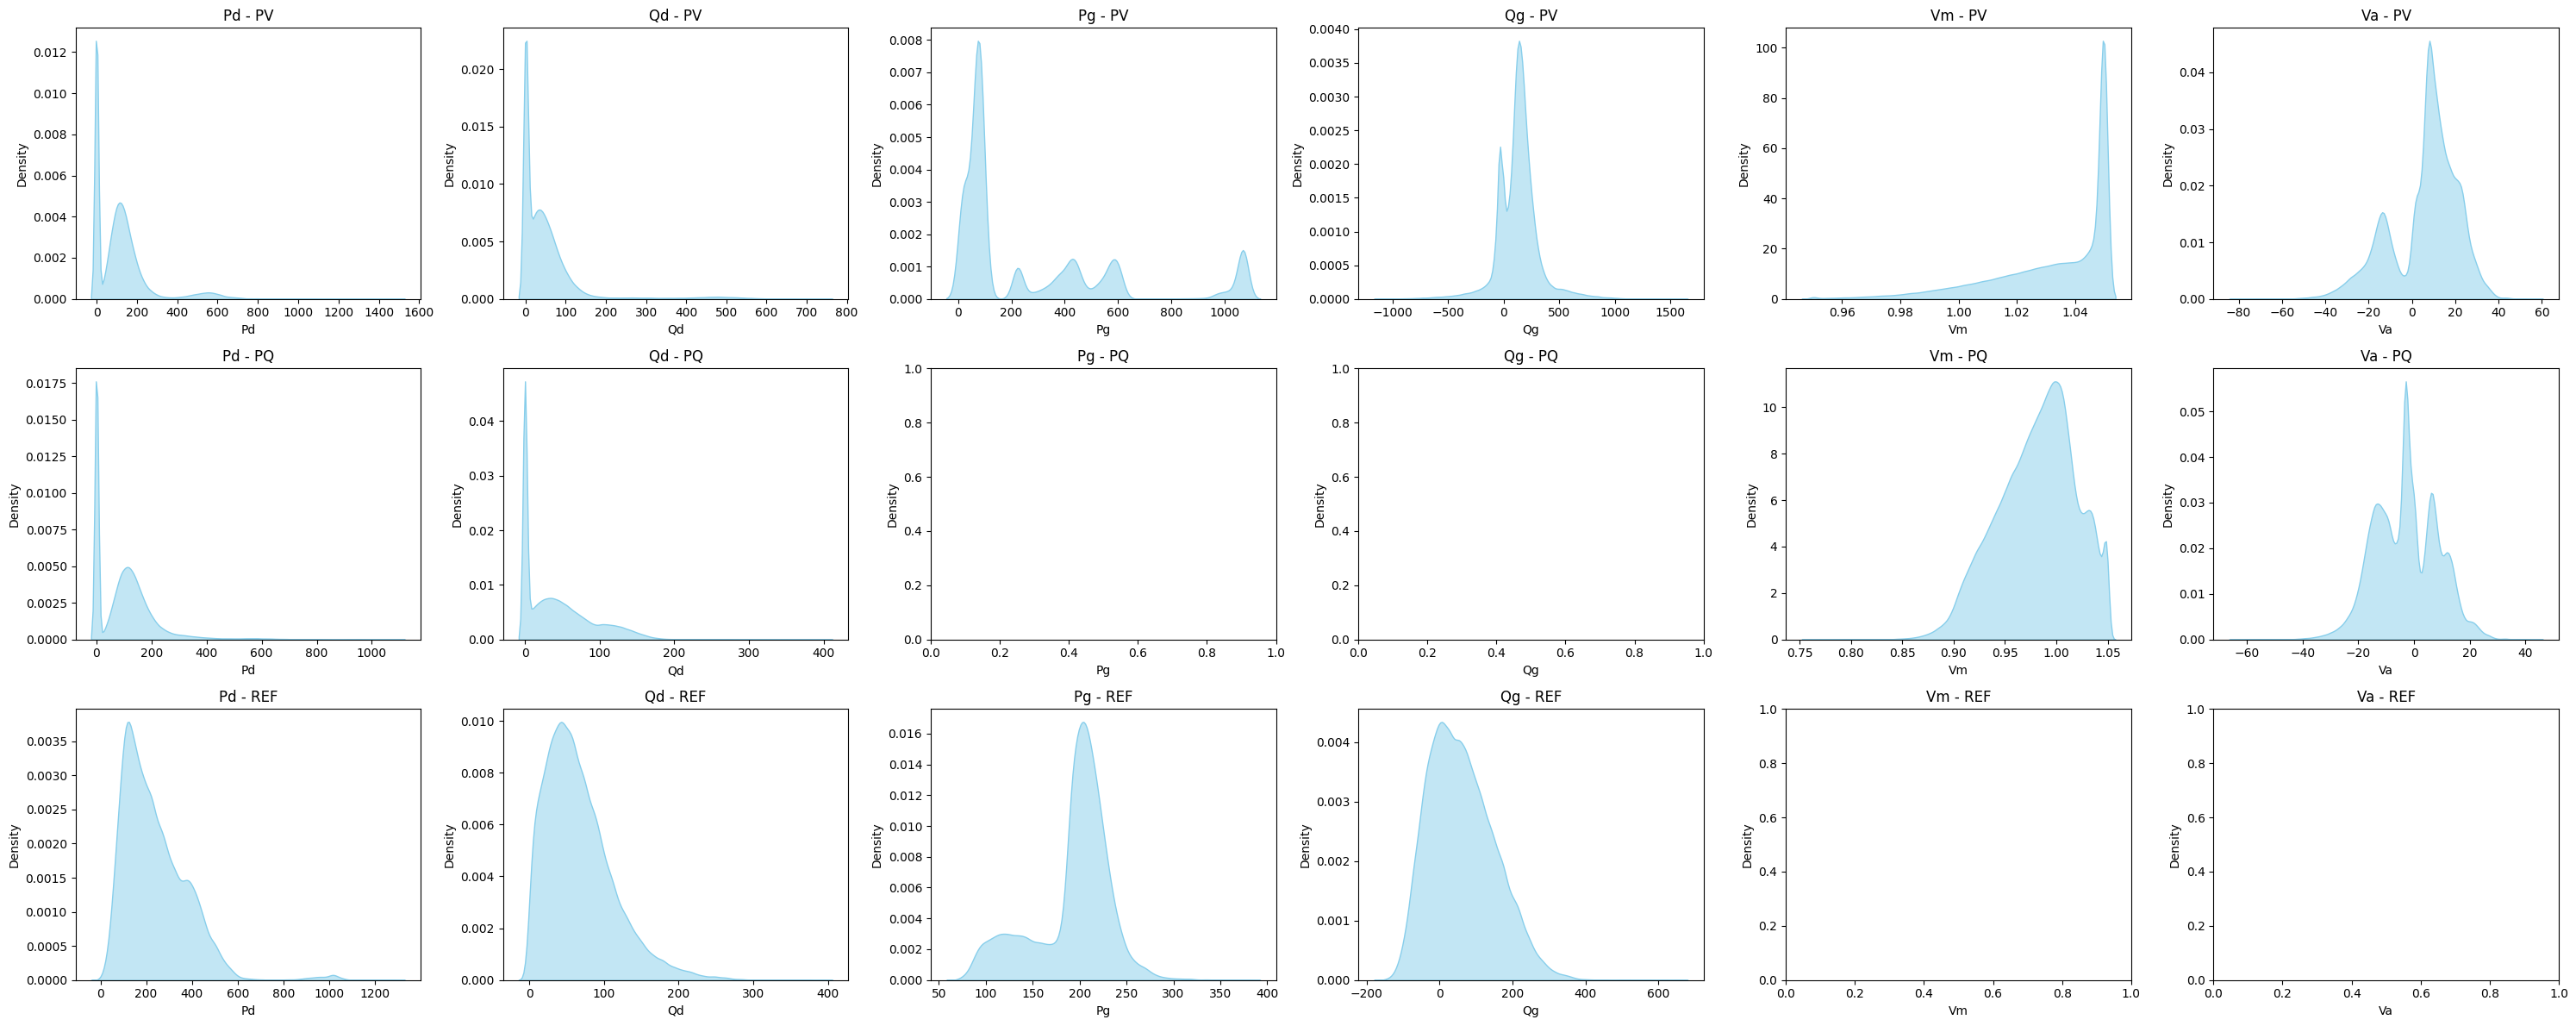

In [8]:

def get_node_type(row):
    if row['REF'] == 1:
        return 'REF'
    elif row['PV'] == 1:
        return 'PV'
    elif row['PQ'] == 1:
        return 'PQ'
    return 'Unknown'

df['Node Type'] = df.apply(get_node_type, axis=1)

# Features to analyze
features = ['Pd', 'Qd', 'Pg', 'Qg', 'Vm', 'Va']

# Node types to plot
node_types = df['Node Type'].unique()

# Set up the plot grid
num_rows = len(node_types)
num_cols = len(features)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows), sharex=False, sharey=False)

for i, node_type in enumerate(node_types):
    node_data = df[df['Node Type'] == node_type]
    for j, feature in enumerate(features):
        ax = axes[i, j] if num_rows > 1 else axes[j]
        sns.kdeplot(data=node_data, x=feature, fill=True, ax=ax, alpha=0.5, color='skyblue')
        ax.set_title(f'{feature} - {node_type}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Density')

plt.tight_layout()
plt.savefig("plot_features.png")